In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

os.chdir('/Users/bebr1814/projects/chuong_bees/analysis/pangenome/alignment_plots')

In [40]:
bee_ids = [
	'florida1',
	# 'florida2',
	# 'florida3',
	# 'florida4',
	# 'thailand1',
	# 'thailand2',
	# 'thailand4',
	# 'tokyo1',
	# 'tokyo2',
	# 'tokyo3',
]

# Total alignments: 352
# 	Primary: 350
# 	Secondary: 2
# Reads with at least one alignment: 60
# Total aligned bases: 15071562
# Average mapping quality: 37.3
# Average highest sequence identity: 0.94
# Average highest map ratio: 0.241
# * Numbers are based on primary alignments and the ones with >0 mapping quality

def parse_stats(file):
	vals = {}
	with open(file,'r') as f:
		lines = f.readlines()
		vals['total_alignments'] = int(lines[0].split(': ')[1])
		vals['primary_alignments'] = int(lines[1].split(': ')[1])
		vals['secondary_alignments'] = int(lines[2].split(': ')[1])
		vals['reads_with_at_least_one_alignment'] = int(lines[3].split(': ')[1])
		vals['total_aligned_bases'] = int(lines[4].split(': ')[1])
		vals['average_mapping_quality'] = float(lines[5].split(': ')[1])
		vals['average_highest_sequence_identity'] = float(lines[6].split(': ')[1])
		vals['average_highest_map_ratio'] = float(lines[7].split(': ')[1])
	return vals

stats = pd.DataFrame(columns=['bee_id', 'chrom', 'gaf_stat_file', 'total_alignments', 'primary_alignments', 'secondary_alignments', 'reads_with_at_least_one_alignment', 'total_aligned_bases', 'average_mapping_quality', 'average_highest_sequence_identity', 'average_highest_map_ratio'])

for bee_id in bee_ids:
	gaf_stats_dirs = glob.glob(f'/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_*/FINAL_GFA/alignments_{bee_id}/')
	for gaf_stat_dir in gaf_stats_dirs:
		chrom = gaf_stat_dir.split('/')[-4]
		print(f'{gaf_stat_dir}*.gaf.stats')
		try:
			gaf_stat_file = glob.glob(f'{gaf_stat_dir}*.gaf.stats')[0]
		except:
			print(f'No gaf stats file found in {gaf_stat_dir}')
			stats.loc[len(stats)] = [bee_id, chrom, gaf_stat_dir, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
			continue
		vals = parse_stats(gaf_stat_file)
		stats.loc[len(stats)] = [bee_id, chrom, gaf_stat_file] + list(vals.values())

stats

/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_037643.1/FINAL_GFA/alignments_florida1/*.gaf.stats
/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_037653.1/FINAL_GFA/alignments_florida1/*.gaf.stats
/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_001566.1/FINAL_GFA/alignments_florida1/*.gaf.stats
/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_037648.1/FINAL_GFA/alignments_florida1/*.gaf.stats
No gaf stats file found in /Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_037648.1/FINAL_GFA/alignments_florida1/
/Users/bebr1814/projects/chuong_bees/data/20

,bee_id,chrom,gaf_stat_file,total_alignments,primary_alignments,secondary_alignments,reads_with_at_least_one_alignment,total_aligned_bases,average_mapping_quality,average_highest_sequence_identity,average_highest_map_ratio
0,florida1,NC_037643.1,/Users/bebr1814/projects/chuong_bees/data/2025...,426797.0,422789.0,4008.0,230064.0,623610445.0,53.1,0.958,0.604
1,florida1,NC_037653.1,/Users/bebr1814/projects/chuong_bees/data/2025...,373222.0,352583.0,20639.0,191325.0,478156813.0,46.2,0.951,0.523
2,florida1,NC_001566.1,/Users/bebr1814/projects/chuong_bees/data/2025...,95665.0,86154.0,9511.0,55870.0,140721356.0,34.9,0.865,0.513
3,florida1,NC_037648.1,/Users/bebr1814/projects/chuong_bees/data/2025...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,florida1,NC_037641.1,/Users/bebr1814/projects/chuong_bees/data/2025...,352824.0,343554.0,9270.0,204674.0,551418123.0,45.4,0.956,0.616
5,florida1,NC_037639.1,/Users/bebr1814/projects/chuong_bees/data/2025...,362842.0,349382.0,13460.0,208796.0,580577172.0,48.5,0.959,0.609
6,florida1,NC_037642.1,/Users/bebr1814/projects/chuong_bees/data/2025...,414765.0,411633.0,3132.0,233294.0,663651984.0,49.8,0.957,0.637
7,florida1,NC_037649.1,/Users/bebr1814/projects/chuong_bees/data/2025...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,florida1,NC_037650.1,/Users/bebr1814/projects/chuong_bees/data/2025...,348863.0,339936.0,8927.0,179200.0,391404433.0,46.1,0.962,0.465
9,florida1,NC_037646.1,/Users/bebr1814/projects/chuong_bees/data/2025...,369129.0,363740.0,5389.0,195074.0,584602993.0,48.0,0.956,0.622


In [41]:
chrom_sizes = pd.read_csv('/Users/bebr1814/projects/chuong_bees/data/reference/GCF_003254395.2/GCF_003254395.2_Amel_HAv3.1.chrom_sizes.csv')

stats = stats.merge(chrom_sizes, on='chrom', how='left')
stats

,bee_id,chrom,gaf_stat_file,total_alignments,primary_alignments,secondary_alignments,reads_with_at_least_one_alignment,total_aligned_bases,average_mapping_quality,average_highest_sequence_identity,average_highest_map_ratio,size
0,florida1,NC_037643.1,/Users/bebr1814/projects/chuong_bees/data/2025...,426797.0,422789.0,4008.0,230064.0,623610445.0,53.1,0.958,0.604,17789102
1,florida1,NC_037653.1,/Users/bebr1814/projects/chuong_bees/data/2025...,373222.0,352583.0,20639.0,191325.0,478156813.0,46.2,0.951,0.523,7238532
2,florida1,NC_001566.1,/Users/bebr1814/projects/chuong_bees/data/2025...,95665.0,86154.0,9511.0,55870.0,140721356.0,34.9,0.865,0.513,16343
3,florida1,NC_037648.1,/Users/bebr1814/projects/chuong_bees/data/2025...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16352600
4,florida1,NC_037641.1,/Users/bebr1814/projects/chuong_bees/data/2025...,352824.0,343554.0,9270.0,204674.0,551418123.0,45.4,0.956,0.616,13404451
5,florida1,NC_037639.1,/Users/bebr1814/projects/chuong_bees/data/2025...,362842.0,349382.0,13460.0,208796.0,580577172.0,48.5,0.959,0.609,16089512
6,florida1,NC_037642.1,/Users/bebr1814/projects/chuong_bees/data/2025...,414765.0,411633.0,3132.0,233294.0,663651984.0,49.8,0.957,0.637,13896941
7,florida1,NC_037649.1,/Users/bebr1814/projects/chuong_bees/data/2025...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11514234
8,florida1,NC_037650.1,/Users/bebr1814/projects/chuong_bees/data/2025...,348863.0,339936.0,8927.0,179200.0,391404433.0,46.1,0.962,0.465,11279722
9,florida1,NC_037646.1,/Users/bebr1814/projects/chuong_bees/data/2025...,369129.0,363740.0,5389.0,195074.0,584602993.0,48.0,0.956,0.622,12354651


In [42]:
# Load graph stats
# /Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_037638.1/odgi_stats/NC_037638.1.gfaffix.og.stats.yaml

# ---
# length: 32114063
# nodes: 2054787
# edges: 2895791
# paths: 6310
# steps: 20794579
# num_weakly_connected_components: 6
# weakly_connected_components: 
#   - component:
#       id: 0
#       nodes: 1
#       is_acyclic: 'yes'
#   - component:
#       id: 1
#       nodes: 1
#       is_acyclic: 'yes'
#   - component:
#       id: 2
#       nodes: 1
#       is_acyclic: 'yes'
#   - component:
#       id: 3
#       nodes: 1
#       is_acyclic: 'yes'
#   - component:
#       id: 4
#       nodes: 1
#       is_acyclic: 'yes'
#   - component:
#       id: 5
#       nodes: 2054782
#       is_acyclic: 'no'
# num_nodes_self_loops:
#   total: 978
#   unique: 978
# A: 10608771
# C: 5415545
# G: 5441411
# N: 79490
# T: 10568846
# file_size_in_bytes: 584213165
# mean_links_length:
#   - length:
#       path: all_paths
#       in_node_space: 2331.85
#       in_nucleotide_space: 34600.3
#       num_links_considered: 20788269
#       num_gap_links_not_penalized: 0
# sum_of_path_node_distances:
#   - distance:
#       path: all_paths
#       in_node_space: 6775.92
#       in_nucleotide_space: 6030.69
#       nodes: 20794579
#       nucleotides: 346695966
#       num_penalties: 9960987
#       num_penalties_different_orientation: 259682

import yaml

def read_graph_stats(stats_yaml):
	with open(stats_yaml, 'r') as f:
		stats = yaml.safe_load(f)
	# flatten the dictionary - rename subkeys with the parent key
	# {'length': 32114063, 'nodes': 2054787, 'edges': 2895791, 'paths': 6310, 'steps': 20794579, 'num_weakly_connected_components': 6, 'weakly_connected_components': [{'component': {'id': 0, 'nodes': 1, 'is_acyclic': 'yes'}}, {'component': {'id': 1, 'nodes': 1, 'is_acyclic': 'yes'}}, {'component': {'id': 2, 'nodes': 1, 'is_acyclic': 'yes'}}, {'component': {'id': 3, 'nodes': 1, 'is_acyclic': 'yes'}}, {'component': {'id': 4, 'nodes': 1, 'is_acyclic': 'yes'}}, {'component': {'id': 5, 'nodes': 2054782, 'is_acyclic': 'no'}}], 'num_nodes_self_loops_total': 978, 'num_nodes_self_loops_unique': 978, 'A': 10608771, 'C': 5415545, 'G': 5441411, 'N': 79490, 'T': 10568846, 'file_size_in_bytes': 584213165, 'mean_links_length': [{'length': {'path': 'all_paths', 'in_node_space': 2331.85, 'in_nucleotide_space': 34600.3, 'num_links_considered': 20788269, 'num_gap_links_not_penalized': 0}}], 'sum_of_path_node_distances': [{'distance': {'path': 'all_paths', 'in_node_space': 6775.92, 'in_nucleotide_space': 6030.69, 'nodes': 20794579, 'nucleotides': 346695966, 'num_penalties': 9960987, 'num_penalties_different_orientation': 259682}}]}

	flat_stats = {}
	for key, value in stats.items():
		if isinstance(value, dict):
			for subkey, subvalue in value.items():
				if isinstance(subvalue, dict):
					for subsubkey, subsubvalue in subvalue.items():
						flat_stats[f'{key}_{subkey}_{subsubkey}'] = subsubvalue
				else:
					flat_stats[f'{key}_{subkey}'] = subvalue
		elif isinstance(value, list):
			for item in value:
				if isinstance(item, dict):
					for subkey, subvalue in item.items():
						if isinstance(subvalue, dict):
							for subsubkey, subsubvalue in subvalue.items():
								flat_stats[f'{key}_{subkey}_{subsubkey}'] = subsubvalue
						else:
							flat_stats[f'{key}_{subkey}'] = subvalue
				else:
					flat_stats[key] = item
		else:
			flat_stats[key] = value
	
	flat_stats_df = pd.DataFrame(flat_stats, index=[0])
	flat_stats_df['chrom'] = stats_yaml.split('/')[-3]

	return flat_stats_df


In [43]:


graph_stats = pd.DataFrame()
for stats_yaml in glob.glob('/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/*/odgi_stats/*gfaffix.og.stats.yaml'):
	graph_stats = pd.concat([graph_stats, read_graph_stats(stats_yaml)], ignore_index=True)

stats = stats.merge(graph_stats, on='chrom', how='left')

In [44]:
print(stats.columns.tolist())
stats.head()

['bee_id', 'chrom', 'gaf_stat_file', 'total_alignments', 'primary_alignments', 'secondary_alignments', 'reads_with_at_least_one_alignment', 'total_aligned_bases', 'average_mapping_quality', 'average_highest_sequence_identity', 'average_highest_map_ratio', 'size', 'length', 'nodes', 'edges', 'paths', 'steps', 'num_weakly_connected_components', 'weakly_connected_components_component_id', 'weakly_connected_components_component_nodes', 'weakly_connected_components_component_is_acyclic', 'num_nodes_self_loops_total', 'num_nodes_self_loops_unique', 'A', 'C', 'G', 'N', 'T', 'file_size_in_bytes', 'mean_links_length_length_path', 'mean_links_length_length_in_node_space', 'mean_links_length_length_in_nucleotide_space', 'mean_links_length_length_num_links_considered', 'mean_links_length_length_num_gap_links_not_penalized', 'sum_of_path_node_distances_distance_path', 'sum_of_path_node_distances_distance_in_node_space', 'sum_of_path_node_distances_distance_in_nucleotide_space', 'sum_of_path_node_di

,bee_id,chrom,gaf_stat_file,total_alignments,primary_alignments,secondary_alignments,reads_with_at_least_one_alignment,total_aligned_bases,average_mapping_quality,average_highest_sequence_identity,...,mean_links_length_length_in_nucleotide_space,mean_links_length_length_num_links_considered,mean_links_length_length_num_gap_links_not_penalized,sum_of_path_node_distances_distance_path,sum_of_path_node_distances_distance_in_node_space,sum_of_path_node_distances_distance_in_nucleotide_space,sum_of_path_node_distances_distance_nodes,sum_of_path_node_distances_distance_nucleotides,sum_of_path_node_distances_distance_num_penalties,sum_of_path_node_distances_distance_num_penalties_different_orientation
0,florida1,NC_037643.1,/Users/bebr1814/projects/chuong_bees/data/2025...,426797.0,422789.0,4008.0,230064.0,623610445.0,53.1,0.958,...,25591.30,14132223,0,all_paths,4930.950,4732.870,14136229,223803962,6991069,264388
1,florida1,NC_037653.1,/Users/bebr1814/projects/chuong_bees/data/2025...,373222.0,352583.0,20639.0,191325.0,478156813.0,46.2,0.951,...,1238.33,6051489,0,all_paths,239.018,184.914,6053258,95973926,2927133,1525
2,florida1,NC_001566.1,/Users/bebr1814/projects/chuong_bees/data/2025...,95665.0,86154.0,9511.0,55870.0,140721356.0,34.9,0.865,...,3712.96,2924914,0,all_paths,136.330,1792.900,2926081,16668891,1489387,45678
3,florida1,NC_037648.1,/Users/bebr1814/projects/chuong_bees/data/2025...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44179.50,28304499,0,all_paths,6941.960,13837.000,28309125,262013771,13965742,1130195
4,florida1,NC_037641.1,/Users/bebr1814/projects/chuong_bees/data/2025...,352824.0,343554.0,9270.0,204674.0,551418123.0,45.4,0.956,...,2073.20,8129281,0,all_paths,276.783,221.921,8132209,166863560,4171947,465


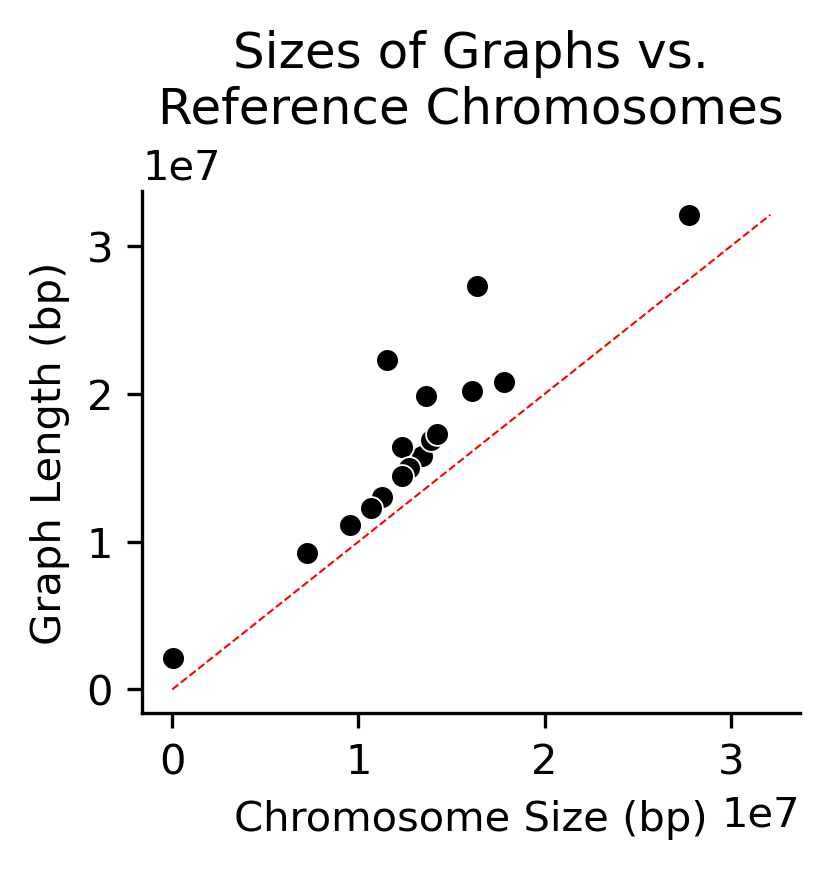

In [45]:
fig,ax = plt.subplots(figsize=(3,3),dpi=300)
sns.scatterplot(data=stats, y='length', x='size', ax=ax, s=30, color='black')
ax.set_ylabel('Graph Length (bp)')
ax.set_xlabel('Chromosome Size (bp)')
# plot a line with slope 1
x = np.linspace(0, max(stats['length']), 100)
ax.plot(x, x, color='red', linestyle='--', linewidth=0.5)
ax.set_title('Sizes of Graphs vs.\nReference Chromosomes')
sns.despine()
plt.tight_layout()
plt.savefig('graph_vs_chrom_sizes.png', dpi=300, bbox_inches='tight')
plt.savefig('graph_vs_chrom_sizes.pdf', dpi=300, bbox_inches='tight')
plt.show()


### Flye graphs

In [ ]:

graph_stats_flye = pd.DataFrame()
for stats_yaml in glob.glob('/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/flye_run/nextflow/odgi_stats/*gfaffix.og.stats.yaml'):
	sdf = read_graph_stats(stats_yaml)
	sdf['filename'] = stats_yaml.split('/')[-1].replace('.stats.yaml','')
	sdf['graph_id'] = sdf['filename'].str.split('.').str[-3].astype(int)
	graph_stats_flye = pd.concat([graph_stats_flye, sdf], ignore_index=True)

graph_stats_flye

,length,nodes,edges,paths,steps,num_weakly_connected_components,weakly_connected_components_component_id,weakly_connected_components_component_nodes,weakly_connected_components_component_is_acyclic,num_nodes_self_loops_total,...,sum_of_path_node_distances_distance_in_node_space,sum_of_path_node_distances_distance_in_nucleotide_space,sum_of_path_node_distances_distance_nodes,sum_of_path_node_distances_distance_nucleotides,sum_of_path_node_distances_distance_num_penalties,sum_of_path_node_distances_distance_num_penalties_different_orientation,chrom,filename,graph_id,N
0,17678,186,248,2,250,1,0,186,yes,0,...,2.95200,1.54682,250,24379,127,0,nextflow,all_contigs.fasta.gz.community.225.gfaffix.og,225,NaN
1,14408,979,1312,2,1314,1,0,979,yes,0,...,1.48858,1.09556,1314,21421,0,0,nextflow,all_contigs.fasta.gz.community.76.gfaffix.og,76,NaN
2,6054427,163656,224654,673,703041,2,1,163655,no,4,...,328.99800,676.73400,703041,13656210,363198,977,nextflow,all_contigs.fasta.gz.community.28.gfaffix.og,28,NaN
3,8190,243,324,2,326,1,0,243,yes,0,...,1.48773,1.29827,326,11922,0,0,nextflow,all_contigs.fasta.gz.community.204.gfaffix.og,204,NaN
4,33197,1375,1857,4,2142,1,0,1375,no,0,...,2.41737,3.07832,2142,42824,91,1,nextflow,all_contigs.fasta.gz.community.73.gfaffix.og,73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,63208,909,1215,3,1218,1,0,909,no,0,...,5.08621,4.23955,1218,80291,374,1,nextflow,all_contigs.fasta.gz.community.200.gfaffix.og,200,NaN
236,2458,90,122,2,124,1,0,90,yes,0,...,1.43548,1.01635,124,4772,0,0,nextflow,all_contigs.fasta.gz.community.155.gfaffix.og,155,NaN
237,11030,101,132,2,134,1,0,101,yes,0,...,1.49254,1.07365,134,12885,0,0,nextflow,all_contigs.fasta.gz.community.193.gfaffix.og,193,NaN
238,768855,29037,39434,67,61162,1,0,29037,no,0,...,27.41890,30.01420,61162,1195214,17579,16,nextflow,all_contigs.fasta.gz.community.30.gfaffix.og,30,NaN


In [ ]:
chrom_sizes = pd.read_csv('/Users/bebr1814/projects/chuong_bees/data/reference/GCF_003254395.2/GCF_003254395.2_Amel_HAv3.1.chrom_sizes.csv')


# for og in /Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/flye_run/nextflow/FINAL_ODGI/*.og; do odgi paths -L -l -i $og | grep "Amel_HAv3.1#1#NC"; done

# Grabbed from the above command
chrom_map = {
	0:'NC_037639.1',
	1:'NC_037642.1',
	2:'NC_037643.1',
	3:'NC_037644.1',
	4:'NC_037645.1',
	6:'NC_001566.1',
	7:'NC_037646.1',
	8:'NC_037649.1',
	9:'NC_037647.1',
	12:'NC_037638.1',
	13:'NC_037651.1',
	14:'NC_037648.1',
	15:'NC_037650.1',
	16:'NC_037652.1',
	17:'NC_037641.1',
	18:'NC_037640.1',
	19:'NC_037653.1',
}

# assign chrom names to the graph stats
graph_stats_flye['chrom'] = graph_stats_flye['graph_id'].map(chrom_map)
graph_stats_flye_main = graph_stats_flye[graph_stats_flye['chrom'].notna()]

graph_stats_flye_main['chrom_size'] = graph_stats_flye_main['chrom'].map(chrom_sizes.set_index('chrom')['size'])
graph_stats_flye_main

/tmp/ipykernel_13747/3005877145.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_stats_flye_main['chrom_size'] = graph_stats_flye_main['chrom'].map(chrom_sizes.set_index('chrom')['size'])


,length,nodes,edges,paths,steps,num_weakly_connected_components,weakly_connected_components_component_id,weakly_connected_components_component_nodes,weakly_connected_components_component_is_acyclic,num_nodes_self_loops_total,...,sum_of_path_node_distances_distance_in_nucleotide_space,sum_of_path_node_distances_distance_nodes,sum_of_path_node_distances_distance_nucleotides,sum_of_path_node_distances_distance_num_penalties,sum_of_path_node_distances_distance_num_penalties_different_orientation,chrom,filename,graph_id,N,chrom_size
25,15823174,850484,1212735,1261,6211305,4,3,1,yes,322,...,87.9885,6211305,116991939,2918173,251,NC_037651.1,all_contigs.fasta.gz.community.13.gfaffix.og,13,418.0,10670842
43,17688489,888430,1275420,1702,7310728,1,0,888430,no,362,...,510.1120,7310728,129610770,3837259,1957,NC_037647.1,all_contigs.fasta.gz.community.9.gfaffix.og,9,720563.0,12360052
66,17940334,1018847,1447922,1396,7426073,3,2,1018845,no,269,...,167.7310,7426073,145588811,3536376,684,NC_037641.1,all_contigs.fasta.gz.community.17.gfaffix.og,17,NaN,13404451
75,24873717,1184417,1703181,1993,9408978,4,3,1184414,no,694,...,422.5640,9408978,175637932,4375051,3324,NC_037648.1,all_contigs.fasta.gz.community.14.gfaffix.og,14,137343.0,16352600
84,18840358,988122,1409297,1517,8091447,3,2,988120,no,419,...,801.6750,8091447,138322372,4074557,2383,NC_037646.1,all_contigs.fasta.gz.community.7.gfaffix.og,7,20434.0,12354651
87,22776250,1177490,1676512,1894,8505016,8,7,1,yes,451,...,166.2430,8505016,176412686,3813181,1645,NC_037639.1,all_contigs.fasta.gz.community.0.gfaffix.og,0,19249.0,16089512
99,16065655,921471,1320119,1484,7394868,5,4,921467,no,573,...,1100.6000,7394868,124279793,3876772,15245,NC_037650.1,all_contigs.fasta.gz.community.15.gfaffix.og,15,15298.0,11279722
110,20327403,1166515,1664361,1665,8501119,8,7,39,yes,310,...,132.0870,8501119,153704553,4483077,217,NC_037642.1,all_contigs.fasta.gz.community.1.gfaffix.og,1,50579.0,13896941
127,17528917,1012206,1440906,1462,7822217,8,7,1012199,no,340,...,127.8730,7822217,127942426,3846534,235,NC_037649.1,all_contigs.fasta.gz.community.8.gfaffix.og,8,12063.0,11514234
133,2647181,241491,354084,1908,4045898,2,1,241490,no,91,...,1336.3000,4045898,25063381,2065107,12327,NC_001566.1,all_contigs.fasta.gz.community.6.gfaffix.og,6,NaN,16343


In [23]:
graph_stats_flye_main.sort_values('length',ascending=False)

,length,nodes,edges,paths,steps,num_weakly_connected_components,weakly_connected_components_component_id,weakly_connected_components_component_nodes,weakly_connected_components_component_is_acyclic,num_nodes_self_loops_total,...,sum_of_path_node_distances_distance_in_nucleotide_space,sum_of_path_node_distances_distance_nodes,sum_of_path_node_distances_distance_nucleotides,sum_of_path_node_distances_distance_num_penalties,sum_of_path_node_distances_distance_num_penalties_different_orientation,chrom,filename,graph_id,N,chrom_size
218,37046294,2065151,2947480,2869,15449931,6,5,2065146,no,754,...,223.4150,15449931,268960304,7637724,752,NC_037638.1,all_contigs.fasta.gz.community.12.gfaffix.og,12,79490.0,27754200
219,25513504,1493183,2123595,2134,10961378,4,3,1493180,no,271,...,170.5060,10961378,193348959,4385371,366,NC_037643.1,all_contigs.fasta.gz.community.2.gfaffix.og,2,133923.0,17789102
75,24873717,1184417,1703181,1993,9408978,4,3,1184414,no,694,...,422.5640,9408978,175637932,4375051,3324,NC_037648.1,all_contigs.fasta.gz.community.14.gfaffix.og,14,137343.0,16352600
87,22776250,1177490,1676512,1894,8505016,8,7,1,yes,451,...,166.2430,8505016,176412686,3813181,1645,NC_037639.1,all_contigs.fasta.gz.community.0.gfaffix.og,0,19249.0,16089512
216,21248258,1271236,1811572,1735,9618912,4,3,1,yes,377,...,808.0420,9618912,157005343,4936432,681,NC_037644.1,all_contigs.fasta.gz.community.3.gfaffix.og,3,200.0,14198698
110,20327403,1166515,1664361,1665,8501119,8,7,39,yes,310,...,132.0870,8501119,153704553,4483077,217,NC_037642.1,all_contigs.fasta.gz.community.1.gfaffix.og,1,50579.0,13896941
155,19149803,1252199,1788681,1654,9164419,3,2,1252197,no,280,...,115.6840,9164419,148279404,4444381,203,NC_037640.1,all_contigs.fasta.gz.community.18.gfaffix.og,18,25238.0,13619445
192,19066771,1115138,1601119,1744,8438085,6,5,1115133,no,286,...,548.5260,8438085,141852629,3790655,532,NC_037645.1,all_contigs.fasta.gz.community.4.gfaffix.og,4,42588.0,12717210
84,18840358,988122,1409297,1517,8091447,3,2,988120,no,419,...,801.6750,8091447,138322372,4074557,2383,NC_037646.1,all_contigs.fasta.gz.community.7.gfaffix.og,7,20434.0,12354651
66,17940334,1018847,1447922,1396,7426073,3,2,1018845,no,269,...,167.7310,7426073,145588811,3536376,684,NC_037641.1,all_contigs.fasta.gz.community.17.gfaffix.og,17,NaN,13404451


In [24]:
graph_stats_flye['length_prop'] = graph_stats_flye['length'] / graph_stats_flye['length'].sum()

graph_stats_flye.sort_values('length',ascending=False,inplace=True)
print(graph_stats_flye[graph_stats_flye['chrom'].notna()]['length_prop'].sum())
print(graph_stats_flye[graph_stats_flye['chrom'].isna()]['length_prop'].sum())

0.9453434778021027
0.05465652219789727


In [25]:
graph_stats_flye_main

,length,nodes,edges,paths,steps,num_weakly_connected_components,weakly_connected_components_component_id,weakly_connected_components_component_nodes,weakly_connected_components_component_is_acyclic,num_nodes_self_loops_total,...,sum_of_path_node_distances_distance_in_nucleotide_space,sum_of_path_node_distances_distance_nodes,sum_of_path_node_distances_distance_nucleotides,sum_of_path_node_distances_distance_num_penalties,sum_of_path_node_distances_distance_num_penalties_different_orientation,chrom,filename,graph_id,N,chrom_size
25,15823174,850484,1212735,1261,6211305,4,3,1,yes,322,...,87.9885,6211305,116991939,2918173,251,NC_037651.1,all_contigs.fasta.gz.community.13.gfaffix.og,13,418.0,10670842
43,17688489,888430,1275420,1702,7310728,1,0,888430,no,362,...,510.1120,7310728,129610770,3837259,1957,NC_037647.1,all_contigs.fasta.gz.community.9.gfaffix.og,9,720563.0,12360052
66,17940334,1018847,1447922,1396,7426073,3,2,1018845,no,269,...,167.7310,7426073,145588811,3536376,684,NC_037641.1,all_contigs.fasta.gz.community.17.gfaffix.og,17,NaN,13404451
75,24873717,1184417,1703181,1993,9408978,4,3,1184414,no,694,...,422.5640,9408978,175637932,4375051,3324,NC_037648.1,all_contigs.fasta.gz.community.14.gfaffix.og,14,137343.0,16352600
84,18840358,988122,1409297,1517,8091447,3,2,988120,no,419,...,801.6750,8091447,138322372,4074557,2383,NC_037646.1,all_contigs.fasta.gz.community.7.gfaffix.og,7,20434.0,12354651
87,22776250,1177490,1676512,1894,8505016,8,7,1,yes,451,...,166.2430,8505016,176412686,3813181,1645,NC_037639.1,all_contigs.fasta.gz.community.0.gfaffix.og,0,19249.0,16089512
99,16065655,921471,1320119,1484,7394868,5,4,921467,no,573,...,1100.6000,7394868,124279793,3876772,15245,NC_037650.1,all_contigs.fasta.gz.community.15.gfaffix.og,15,15298.0,11279722
110,20327403,1166515,1664361,1665,8501119,8,7,39,yes,310,...,132.0870,8501119,153704553,4483077,217,NC_037642.1,all_contigs.fasta.gz.community.1.gfaffix.og,1,50579.0,13896941
127,17528917,1012206,1440906,1462,7822217,8,7,1012199,no,340,...,127.8730,7822217,127942426,3846534,235,NC_037649.1,all_contigs.fasta.gz.community.8.gfaffix.og,8,12063.0,11514234
133,2647181,241491,354084,1908,4045898,2,1,241490,no,91,...,1336.3000,4045898,25063381,2065107,12327,NC_001566.1,all_contigs.fasta.gz.community.6.gfaffix.og,6,NaN,16343


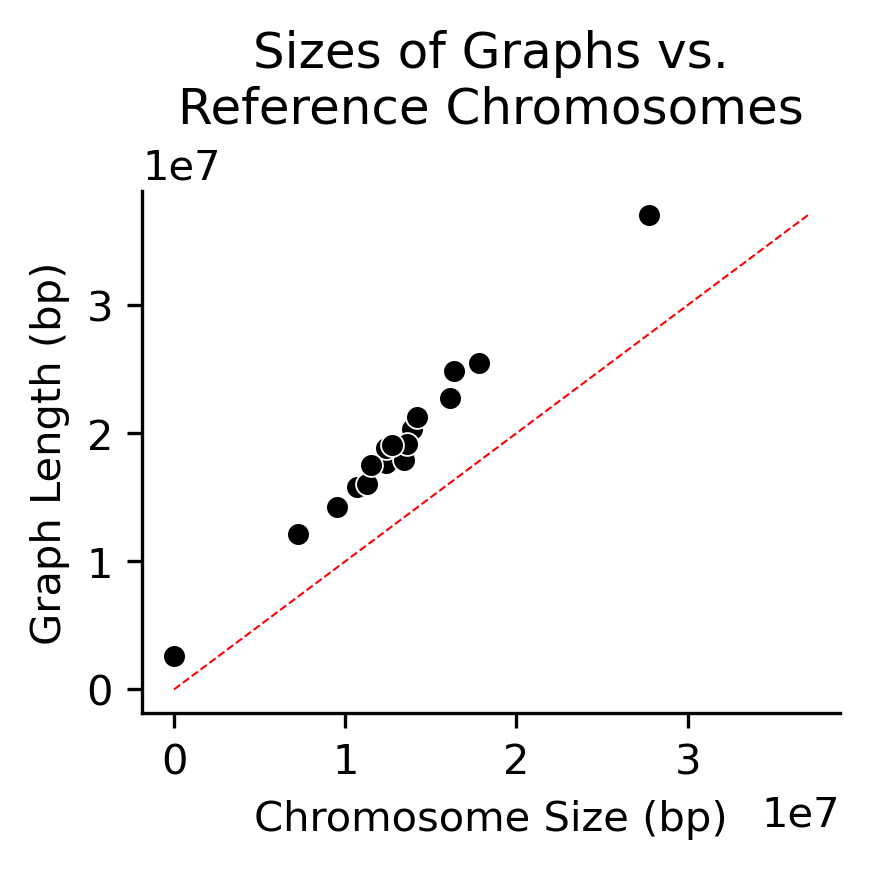

In [26]:
fig,ax = plt.subplots(figsize=(3,3),dpi=300)
sns.scatterplot(data=graph_stats_flye_main, y='length', x='chrom_size', ax=ax, s=30, color='black')
ax.set_ylabel('Graph Length (bp)')
ax.set_xlabel('Chromosome Size (bp)')
# plot a line with slope 1
x = np.linspace(0, max(graph_stats_flye_main['length']), 100)
ax.plot(x, x, color='red', linestyle='--', linewidth=0.5)
ax.set_title('Sizes of Graphs vs.\nReference Chromosomes')
sns.despine()
plt.tight_layout()
plt.savefig('graph_vs_chrom_sizes.flye.png', dpi=300, bbox_inches='tight')
plt.savefig('graph_vs_chrom_sizes.flye.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Compare graphs btw assemblies

In [46]:
hifiasm = stats.copy(deep=True)
hifiasm = hifiasm[['chrom','size', 'length', 'nodes', 'edges', 'paths', 'steps', 'num_weakly_connected_components', 'weakly_connected_components_component_id', 'weakly_connected_components_component_nodes', 'weakly_connected_components_component_is_acyclic', 'num_nodes_self_loops_total', 'num_nodes_self_loops_unique', 'A', 'C', 'G', 'N', 'T', 'file_size_in_bytes', 'mean_links_length_length_path', 'mean_links_length_length_in_node_space', 'mean_links_length_length_in_nucleotide_space', 'mean_links_length_length_num_links_considered', 'mean_links_length_length_num_gap_links_not_penalized', 'sum_of_path_node_distances_distance_path', 'sum_of_path_node_distances_distance_in_node_space', 'sum_of_path_node_distances_distance_in_nucleotide_space', 'sum_of_path_node_distances_distance_nodes', 'sum_of_path_node_distances_distance_nucleotides', 'sum_of_path_node_distances_distance_num_penalties', 'sum_of_path_node_distances_distance_num_penalties_different_orientation']]
hifiasm.rename(columns={'size':'chrom_size'}, inplace=True)
flye = graph_stats_flye_main.copy(deep=True).drop(columns=['graph_id', 'filename'])

print(hifiasm.columns.tolist())
print(flye.columns.tolist())

['chrom', 'chrom_size', 'length', 'nodes', 'edges', 'paths', 'steps', 'num_weakly_connected_components', 'weakly_connected_components_component_id', 'weakly_connected_components_component_nodes', 'weakly_connected_components_component_is_acyclic', 'num_nodes_self_loops_total', 'num_nodes_self_loops_unique', 'A', 'C', 'G', 'N', 'T', 'file_size_in_bytes', 'mean_links_length_length_path', 'mean_links_length_length_in_node_space', 'mean_links_length_length_in_nucleotide_space', 'mean_links_length_length_num_links_considered', 'mean_links_length_length_num_gap_links_not_penalized', 'sum_of_path_node_distances_distance_path', 'sum_of_path_node_distances_distance_in_node_space', 'sum_of_path_node_distances_distance_in_nucleotide_space', 'sum_of_path_node_distances_distance_nodes', 'sum_of_path_node_distances_distance_nucleotides', 'sum_of_path_node_distances_distance_num_penalties', 'sum_of_path_node_distances_distance_num_penalties_different_orientation']
['length', 'nodes', 'edges', 'paths'

In [47]:
hifiasm

,chrom,chrom_size,length,nodes,edges,paths,steps,num_weakly_connected_components,weakly_connected_components_component_id,weakly_connected_components_component_nodes,...,mean_links_length_length_in_nucleotide_space,mean_links_length_length_num_links_considered,mean_links_length_length_num_gap_links_not_penalized,sum_of_path_node_distances_distance_path,sum_of_path_node_distances_distance_in_node_space,sum_of_path_node_distances_distance_in_nucleotide_space,sum_of_path_node_distances_distance_nodes,sum_of_path_node_distances_distance_nucleotides,sum_of_path_node_distances_distance_num_penalties,sum_of_path_node_distances_distance_num_penalties_different_orientation
0,NC_037643.1,17789102,20811748,1326121,1871212,4006,14136229,2,1,1326120,...,25591.30,14132223,0,all_paths,4930.950,4732.870,14136229,223803962,6991069,264388
1,NC_037653.1,7238532,9224736,667977,950164,1769,6053258,1,0,667977,...,1238.33,6051489,0,all_paths,239.018,184.914,6053258,95973926,2927133,1525
2,NC_001566.1,16343,2127685,13652,20857,1167,2926081,14,13,13309,...,3712.96,2924914,0,all_paths,136.330,1792.900,2926081,16668891,1489387,45678
3,NC_037648.1,16352600,27276160,1262546,1806538,4626,28309125,5,4,1262515,...,44179.50,28304499,0,all_paths,6941.960,13837.000,28309125,262013771,13965742,1130195
4,NC_037641.1,13404451,15799737,927169,1307558,2928,8132209,2,1,927168,...,2073.20,8129281,0,all_paths,276.783,221.921,8132209,166863560,4171947,465
5,NC_037639.1,16089512,20171965,1142801,1611748,3744,10825167,3,2,1142769,...,14419.50,10821423,0,all_paths,2508.730,2156.870,10825167,212535607,5398453,89769
6,NC_037642.1,13896941,16846858,1050745,1479284,3133,9782800,9,8,1050737,...,11214.70,9779667,0,all_paths,1680.090,1623.250,9782800,175149773,5035171,56166
7,NC_037649.1,11514234,22284433,1074135,1529682,3968,39386111,17,16,1074117,...,59845.80,39382143,0,all_paths,9696.130,32305.900,39386111,212663274,19364353,5336788
8,NC_037650.1,11279722,13026510,817140,1154315,2532,9544616,1,0,817140,...,30126.10,9542084,0,all_paths,6143.860,6092.250,9544616,139915858,4882754,258874
9,NC_037646.1,12354651,16387531,978004,1387627,3541,14467819,6,5,1286,...,26061.50,14464278,0,all_paths,3973.390,4777.380,14467819,186215894,7375817,70034


In [48]:
# Add a column indicating assembler, then concatenate
hifiasm['assembler'] = 'hifiasm'
flye['assembler'] = 'flye'
stats_combined = pd.concat([hifiasm, flye], ignore_index=True)

stats_combined

,chrom,chrom_size,length,nodes,edges,paths,steps,num_weakly_connected_components,weakly_connected_components_component_id,weakly_connected_components_component_nodes,...,mean_links_length_length_num_links_considered,mean_links_length_length_num_gap_links_not_penalized,sum_of_path_node_distances_distance_path,sum_of_path_node_distances_distance_in_node_space,sum_of_path_node_distances_distance_in_nucleotide_space,sum_of_path_node_distances_distance_nodes,sum_of_path_node_distances_distance_nucleotides,sum_of_path_node_distances_distance_num_penalties,sum_of_path_node_distances_distance_num_penalties_different_orientation,assembler
0,NC_037643.1,17789102,20811748,1326121,1871212,4006,14136229,2,1,1326120,...,14132223,0,all_paths,4930.9500,4732.8700,14136229,223803962,6991069,264388,hifiasm
1,NC_037653.1,7238532,9224736,667977,950164,1769,6053258,1,0,667977,...,6051489,0,all_paths,239.0180,184.9140,6053258,95973926,2927133,1525,hifiasm
2,NC_001566.1,16343,2127685,13652,20857,1167,2926081,14,13,13309,...,2924914,0,all_paths,136.3300,1792.9000,2926081,16668891,1489387,45678,hifiasm
3,NC_037648.1,16352600,27276160,1262546,1806538,4626,28309125,5,4,1262515,...,28304499,0,all_paths,6941.9600,13837.0000,28309125,262013771,13965742,1130195,hifiasm
4,NC_037641.1,13404451,15799737,927169,1307558,2928,8132209,2,1,927168,...,8129281,0,all_paths,276.7830,221.9210,8132209,166863560,4171947,465,hifiasm
5,NC_037639.1,16089512,20171965,1142801,1611748,3744,10825167,3,2,1142769,...,10821423,0,all_paths,2508.7300,2156.8700,10825167,212535607,5398453,89769,hifiasm
6,NC_037642.1,13896941,16846858,1050745,1479284,3133,9782800,9,8,1050737,...,9779667,0,all_paths,1680.0900,1623.2500,9782800,175149773,5035171,56166,hifiasm
7,NC_037649.1,11514234,22284433,1074135,1529682,3968,39386111,17,16,1074117,...,39382143,0,all_paths,9696.1300,32305.9000,39386111,212663274,19364353,5336788,hifiasm
8,NC_037650.1,11279722,13026510,817140,1154315,2532,9544616,1,0,817140,...,9542084,0,all_paths,6143.8600,6092.2500,9544616,139915858,4882754,258874,hifiasm
9,NC_037646.1,12354651,16387531,978004,1387627,3541,14467819,6,5,1286,...,14464278,0,all_paths,3973.3900,4777.3800,14467819,186215894,7375817,70034,hifiasm


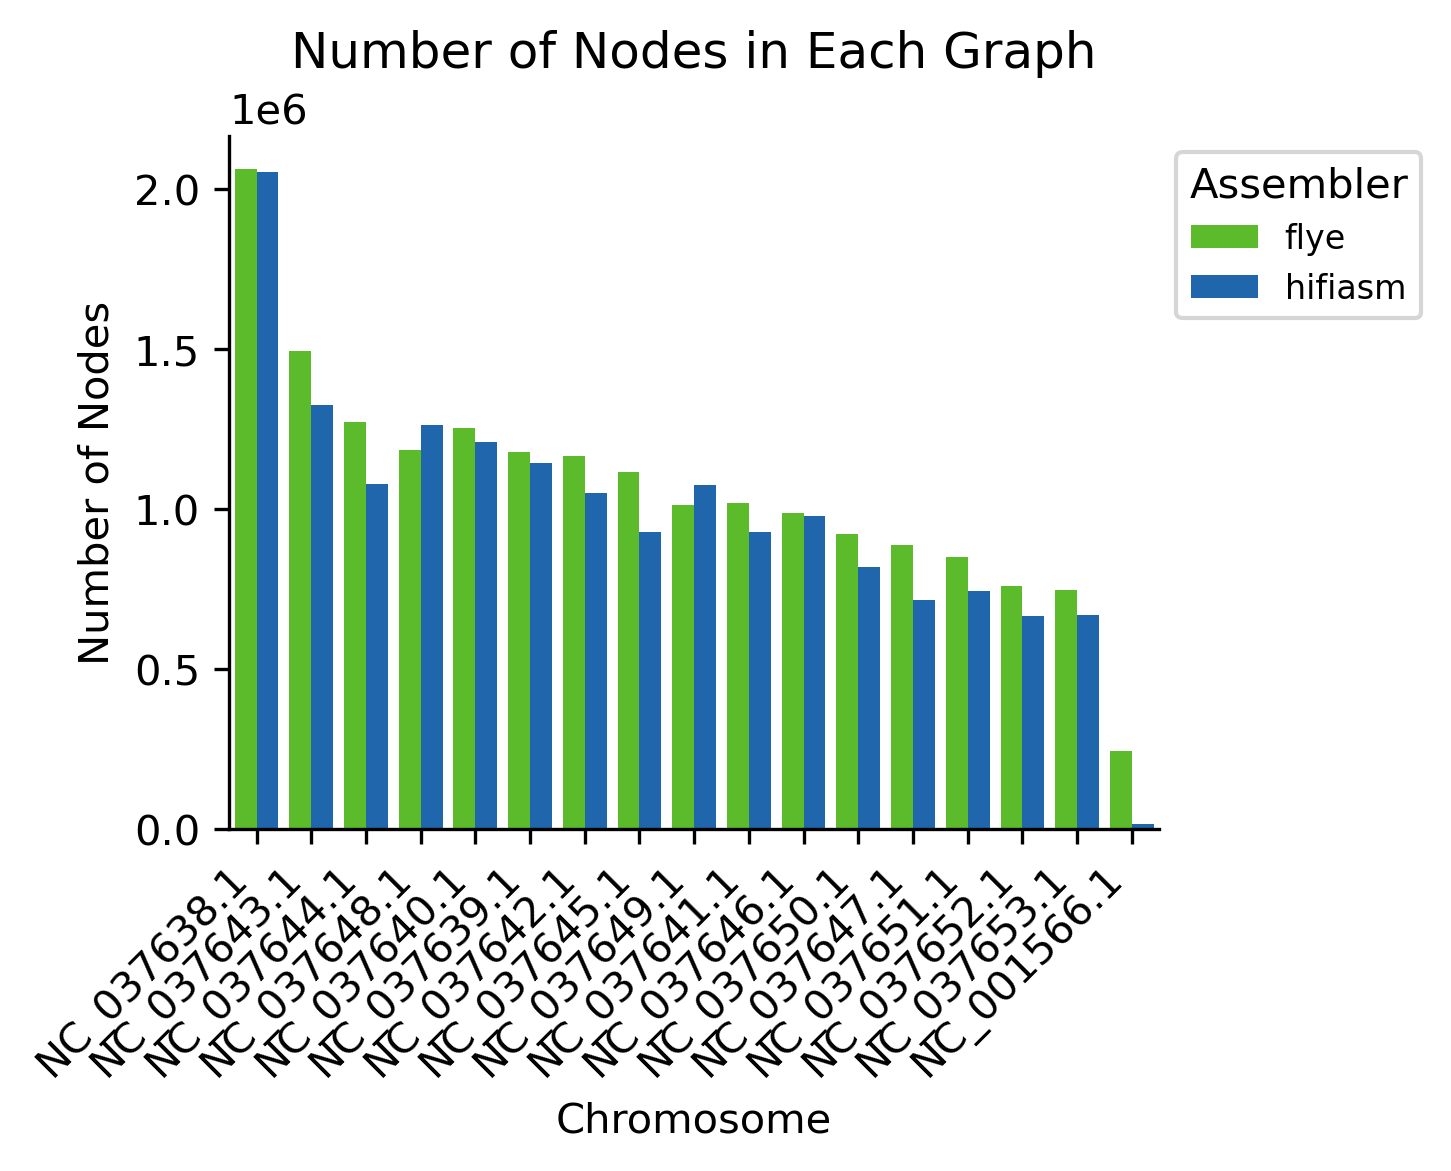

In [64]:
# Barplot of the number of nodes in each graph
fig,ax = plt.subplots(figsize=(4,3),dpi=300)
# sort by number of nodes
stats_combined.sort_values('nodes', ascending=False, inplace=True)
sns.barplot(data=stats_combined, x='chrom', y='nodes', hue='assembler', ax=ax, palette=['#53d313', '#0766c5'])
ax.set_ylabel('Number of Nodes')
ax.set_xlabel('Chromosome')
ax.set_title('Number of Nodes in Each Graph')
plt.xticks(rotation=45, ha='right')
# legend outside the plot
ax.legend(title='Assembler', loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
sns.despine()
plt.savefig('nodes_per_chrom.png', dpi=300, bbox_inches='tight')
plt.savefig('nodes_per_chrom.pdf', dpi=300, bbox_inches='tight')
plt.show()

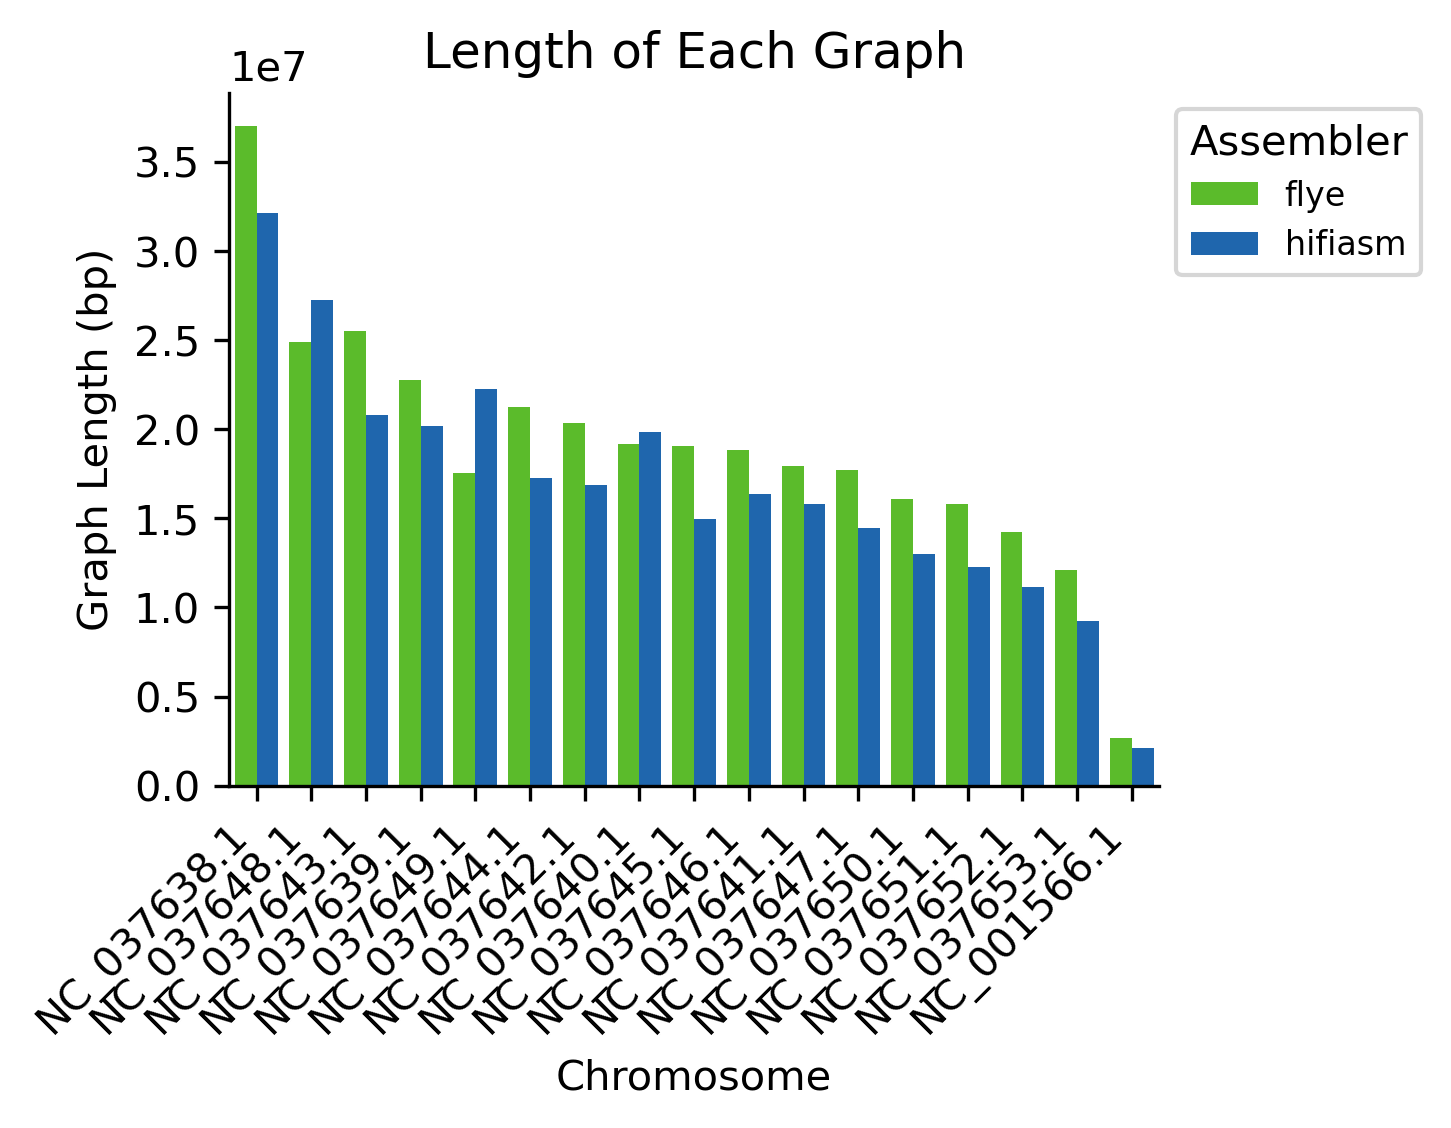

In [65]:
# Barplot of the number of nodes in each graph
fig,ax = plt.subplots(figsize=(4,3),dpi=300)
# sort by number of nodes
stats_combined.sort_values('length', ascending=False, inplace=True)
sns.barplot(data=stats_combined, x='chrom', y='length', hue='assembler', ax=ax, palette=['#53d313', '#0766c5'])
ax.set_ylabel('Graph Length (bp)')
ax.set_xlabel('Chromosome')
ax.set_title('Length of Each Graph')
plt.xticks(rotation=45, ha='right')
# legend outside the plot
ax.legend(title='Assembler', loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
sns.despine()
plt.savefig('length_per_chrom.png', dpi=300, bbox_inches='tight')
plt.savefig('length_per_chrom.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
stats_combined

,chrom,chrom_size,length,nodes,edges,paths,steps,num_weakly_connected_components,weakly_connected_components_component_id,weakly_connected_components_component_nodes,...,mean_links_length_length_num_links_considered,mean_links_length_length_num_gap_links_not_penalized,sum_of_path_node_distances_distance_path,sum_of_path_node_distances_distance_in_node_space,sum_of_path_node_distances_distance_in_nucleotide_space,sum_of_path_node_distances_distance_nodes,sum_of_path_node_distances_distance_nucleotides,sum_of_path_node_distances_distance_num_penalties,sum_of_path_node_distances_distance_num_penalties_different_orientation,assembler
32,NC_037638.1,27754200,37046294,2065151,2947480,2869,15449931,6,5,2065146,...,15447062,0,all_paths,233.7340,223.4150,15449931,268960304,7637724,752,flye
13,NC_037638.1,27754200,32114063,2054787,2895791,6310,20794579,6,5,2054782,...,20788269,0,all_paths,6775.9200,6030.6900,20794579,346695966,9960987,259682,hifiasm
3,NC_037648.1,16352600,27276160,1262546,1806538,4626,28309125,5,4,1262515,...,28304499,0,all_paths,6941.9600,13837.0000,28309125,262013771,13965742,1130195,hifiasm
33,NC_037643.1,17789102,25513504,1493183,2123595,2134,10961378,4,3,1493180,...,10959244,0,all_paths,201.4590,170.5060,10961378,193348959,4385371,366,flye
20,NC_037648.1,16352600,24873717,1184417,1703181,1993,9408978,4,3,1184414,...,9406985,0,all_paths,481.6330,422.5640,9408978,175637932,4375051,3324,flye
22,NC_037639.1,16089512,22776250,1177490,1676512,1894,8505016,8,7,1,...,8503122,0,all_paths,198.7420,166.2430,8505016,176412686,3813181,1645,flye
7,NC_037649.1,11514234,22284433,1074135,1529682,3968,39386111,17,16,1074117,...,39382143,0,all_paths,9696.1300,32305.9000,39386111,212663274,19364353,5336788,hifiasm
31,NC_037644.1,14198698,21248258,1271236,1811572,1735,9618912,4,3,1,...,9617177,0,all_paths,979.4100,808.0420,9618912,157005343,4936432,681,flye
0,NC_037643.1,17789102,20811748,1326121,1871212,4006,14136229,2,1,1326120,...,14132223,0,all_paths,4930.9500,4732.8700,14136229,223803962,6991069,264388,hifiasm
24,NC_037642.1,13896941,20327403,1166515,1664361,1665,8501119,8,7,39,...,8499454,0,all_paths,161.9080,132.0870,8501119,153704553,4483077,217,flye


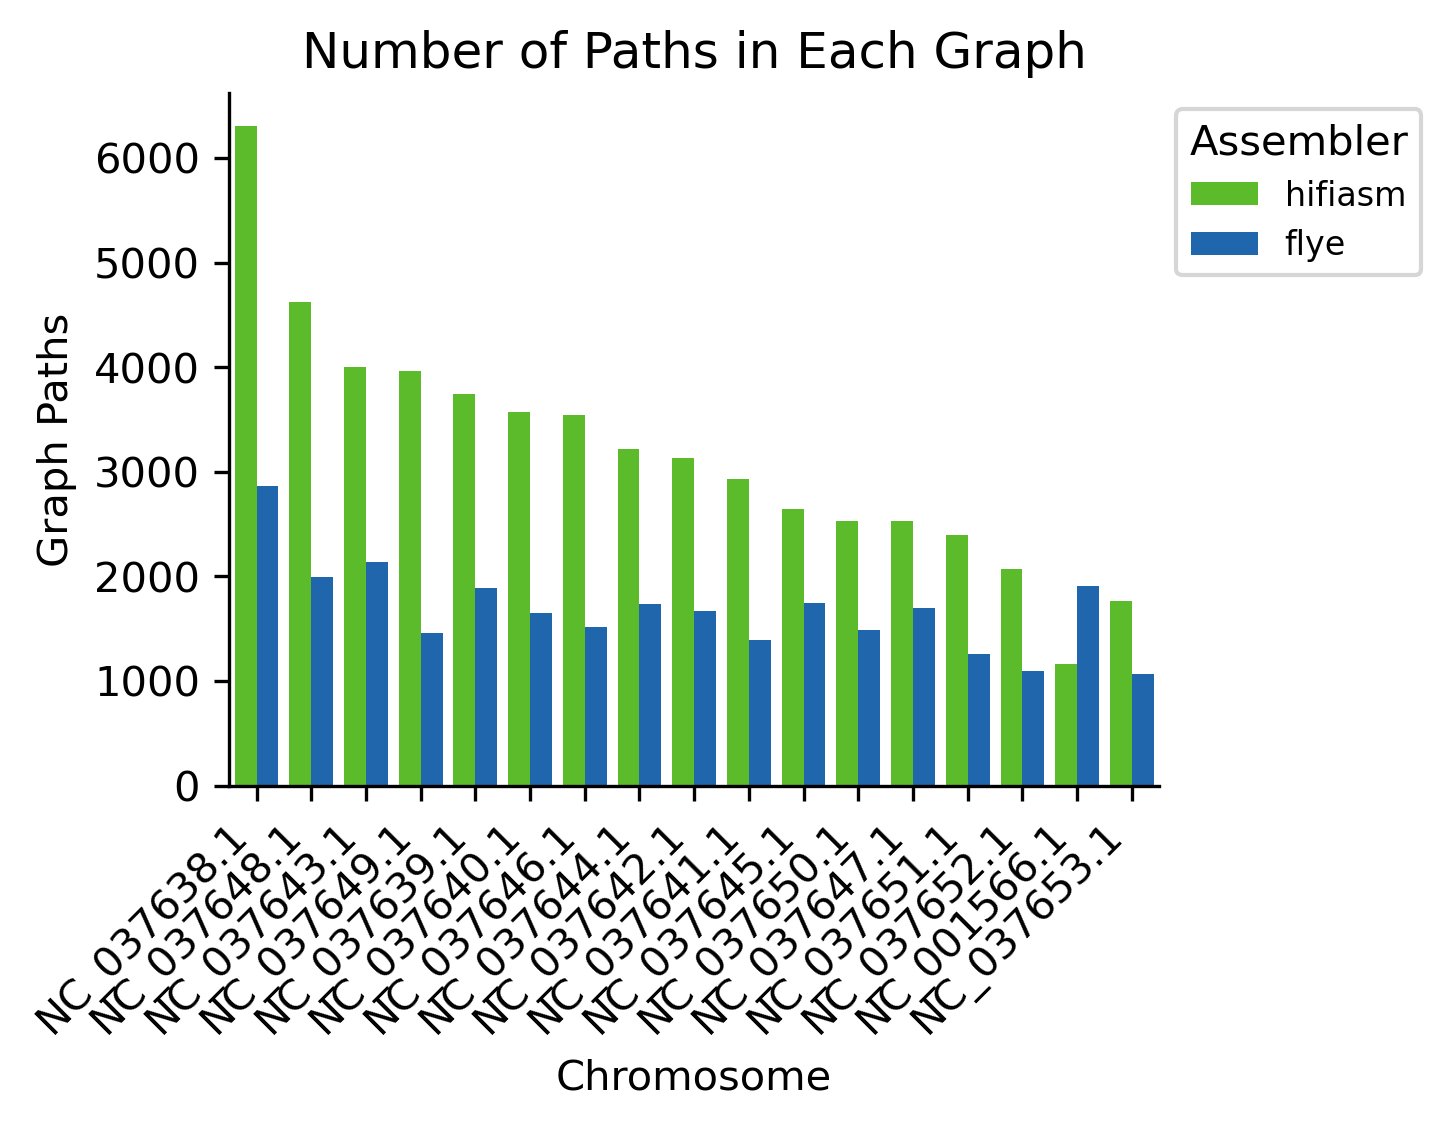

In [67]:
# Barplot of the number of nodes in each graph
fig,ax = plt.subplots(figsize=(4,3),dpi=300)
# sort by number of nodes
stats_combined.sort_values('paths', ascending=False, inplace=True)
sns.barplot(data=stats_combined, x='chrom', y='paths', hue='assembler', ax=ax, palette=['#53d313', '#0766c5'])
ax.set_ylabel('Graph Paths')
ax.set_xlabel('Chromosome')
ax.set_title('Number of Paths in Each Graph')
plt.xticks(rotation=45, ha='right')
# legend outside the plot
ax.legend(title='Assembler', loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
sns.despine()
plt.savefig('paths_per_chrom.png', dpi=300, bbox_inches='tight')
plt.savefig('paths_per_chrom.pdf', dpi=300, bbox_inches='tight')
plt.show()